In [43]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA,IncrementalPCA
import seaborn as sns

In [26]:
pca = IncrementalPCA(n_components=10)

In [27]:
train = pd.read_csv('/Applications/Splunk/etc/apps/Splunk_ML_Toolkit/lookups/A1_train_data.csv', sep=',')

In [28]:
pca.fit(train)

IncrementalPCA(n_components=10)

In [29]:
trainPCA = pca.transform(train)

In [30]:
principalDf = pd.DataFrame(data = trainPCA, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [40]:
principalDf.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster
0,-0.003880,-0.461098,-1.188942,0.018107,0.541963,-0.010794,0.041620,0.055149,-0.000330,-0.001358,0
1,-0.007473,-0.599533,-1.519159,0.029847,-0.639408,-0.415963,-0.237650,-0.437798,-0.011286,-0.048951,0
2,-0.007635,-0.599531,-1.519159,0.029929,-0.639408,-0.415963,-0.237650,-0.437794,-0.011471,-0.048951,0
3,-0.007636,-0.599531,-1.519159,0.029927,-0.639408,-0.415963,-0.237650,-0.437794,-0.011472,-0.048951,0
4,-0.007799,-0.599529,-1.519160,0.030010,-0.639407,-0.415962,-0.237651,-0.437789,-0.011656,-0.048951,0
5,-0.007800,-0.599529,-1.519160,0.030009,-0.639407,-0.415962,-0.237651,-0.437789,-0.011656,-0.048951,0
6,-0.007798,-0.599529,-1.519160,0.030009,-0.639407,-0.415962,-0.237651,-0.437789,-0.011657,-0.048951,0
7,-0.007473,-0.599533,-1.519159,0.029847,-0.639408,-0.415963,-0.237650,-0.437798,-0.011286,-0.048951,0
8,-0.007471,-0.599534,-1.519159,0.029851,-0.639408,-0.415963,-0.237650,-0.437798,-0.011286,-0.048951,0
9,-0.007471,-0.599534,-1.519159,0.029850,-0.639408,-0.415963,-0.237650,-0.437798,-0.011286,-0.048951,0


In [33]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(principalDf.values)

KMeans(n_clusters=3, random_state=0)

In [34]:
kmeans.cluster_centers_

array([[-1.15642535e-02, -2.10073273e-01,  3.71502540e-02,
        -4.75778336e-04, -2.25083220e-03,  2.08797406e-04,
         4.48517644e-04,  8.41898548e-05,  1.12277800e-04,
        -2.24000704e-06],
       [ 1.52868008e-01,  4.23590499e+00, -7.49380641e-01,
         2.02105403e-02,  4.55172145e-02, -4.21426060e-03,
        -9.03775123e-03, -1.69386536e-03, -1.73016923e-03,
         4.50398015e-05],
       [ 3.23075575e+02, -2.91986376e+00,  1.66392314e+00,
        -4.27368728e+01, -5.60807907e-01,  1.93315262e-02,
        -1.84449689e-02, -1.38575549e-02, -2.14680495e+00,
         4.82286683e-04]])

In [37]:
predict = kmeans.predict(principalDf)

In [38]:
predict

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [11]:
#kmeans.labels_[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [39]:
principalDf['cluster'] = predict

In [42]:
principalDf['cluster'].value_counts()

0    13225844
1      656028
2         163
Name: cluster, dtype: int64

In [46]:
d2 = principalDf.loc[principalDf['cluster'] == 2]

In [64]:
d2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster
42330,296.487717,-0.959005,-0.909124,-138.118560,-0.821304,-0.027890,0.027867,-0.574712,27.706370,0.003724,2
77793,164.045040,2.622254,0.100128,-77.892472,-0.645430,0.005163,0.002575,-0.255301,10.929448,-0.002101,2
348964,444.411187,-4.954078,0.187397,-204.775201,-1.643990,-0.074939,0.009878,-0.967865,45.153573,0.012412,2
524311,255.555510,-0.874872,-1.038245,-126.570828,-0.738355,-0.017026,-0.032184,0.326587,-8.097330,-0.012487,2
614948,289.234453,0.087604,-1.163188,-133.685342,-0.720499,-0.019426,0.049156,-0.773710,35.312897,0.006376,2


In [58]:
d0 = principalDf.loc[principalDf['cluster'] == 0].sample(frac =.01)
d1 = principalDf.loc[principalDf['cluster'] == 1].sample(frac =.01)

In [63]:
d0.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster
7293196,-0.024323,-0.083289,0.699222,-0.009294,-0.003164,-0.016656,0.004098,-0.007856,0.000156,0.000685,0
7582974,0.000821,-0.393606,-1.205561,0.017619,0.544866,-0.010108,0.041952,0.054900,-0.000540,-0.001436,0
484834,-0.024156,-0.083291,0.699222,-0.009374,-0.003165,-0.016656,0.004098,-0.007860,0.000339,0.000685,0
5211833,-0.024322,-0.083289,0.699221,-0.009293,-0.003164,-0.016656,0.004098,-0.007856,0.000155,0.000685,0
8980529,-0.024325,-0.083289,0.699221,-0.009297,-0.003164,-0.016656,0.004098,-0.007856,0.000156,0.000685,0


In [60]:
frames = [d2, d1, d0]
sample = pd.concat(frames)

In [61]:
sample['cluster'].value_counts()

0    132258
1      6560
2       163
Name: cluster, dtype: int64

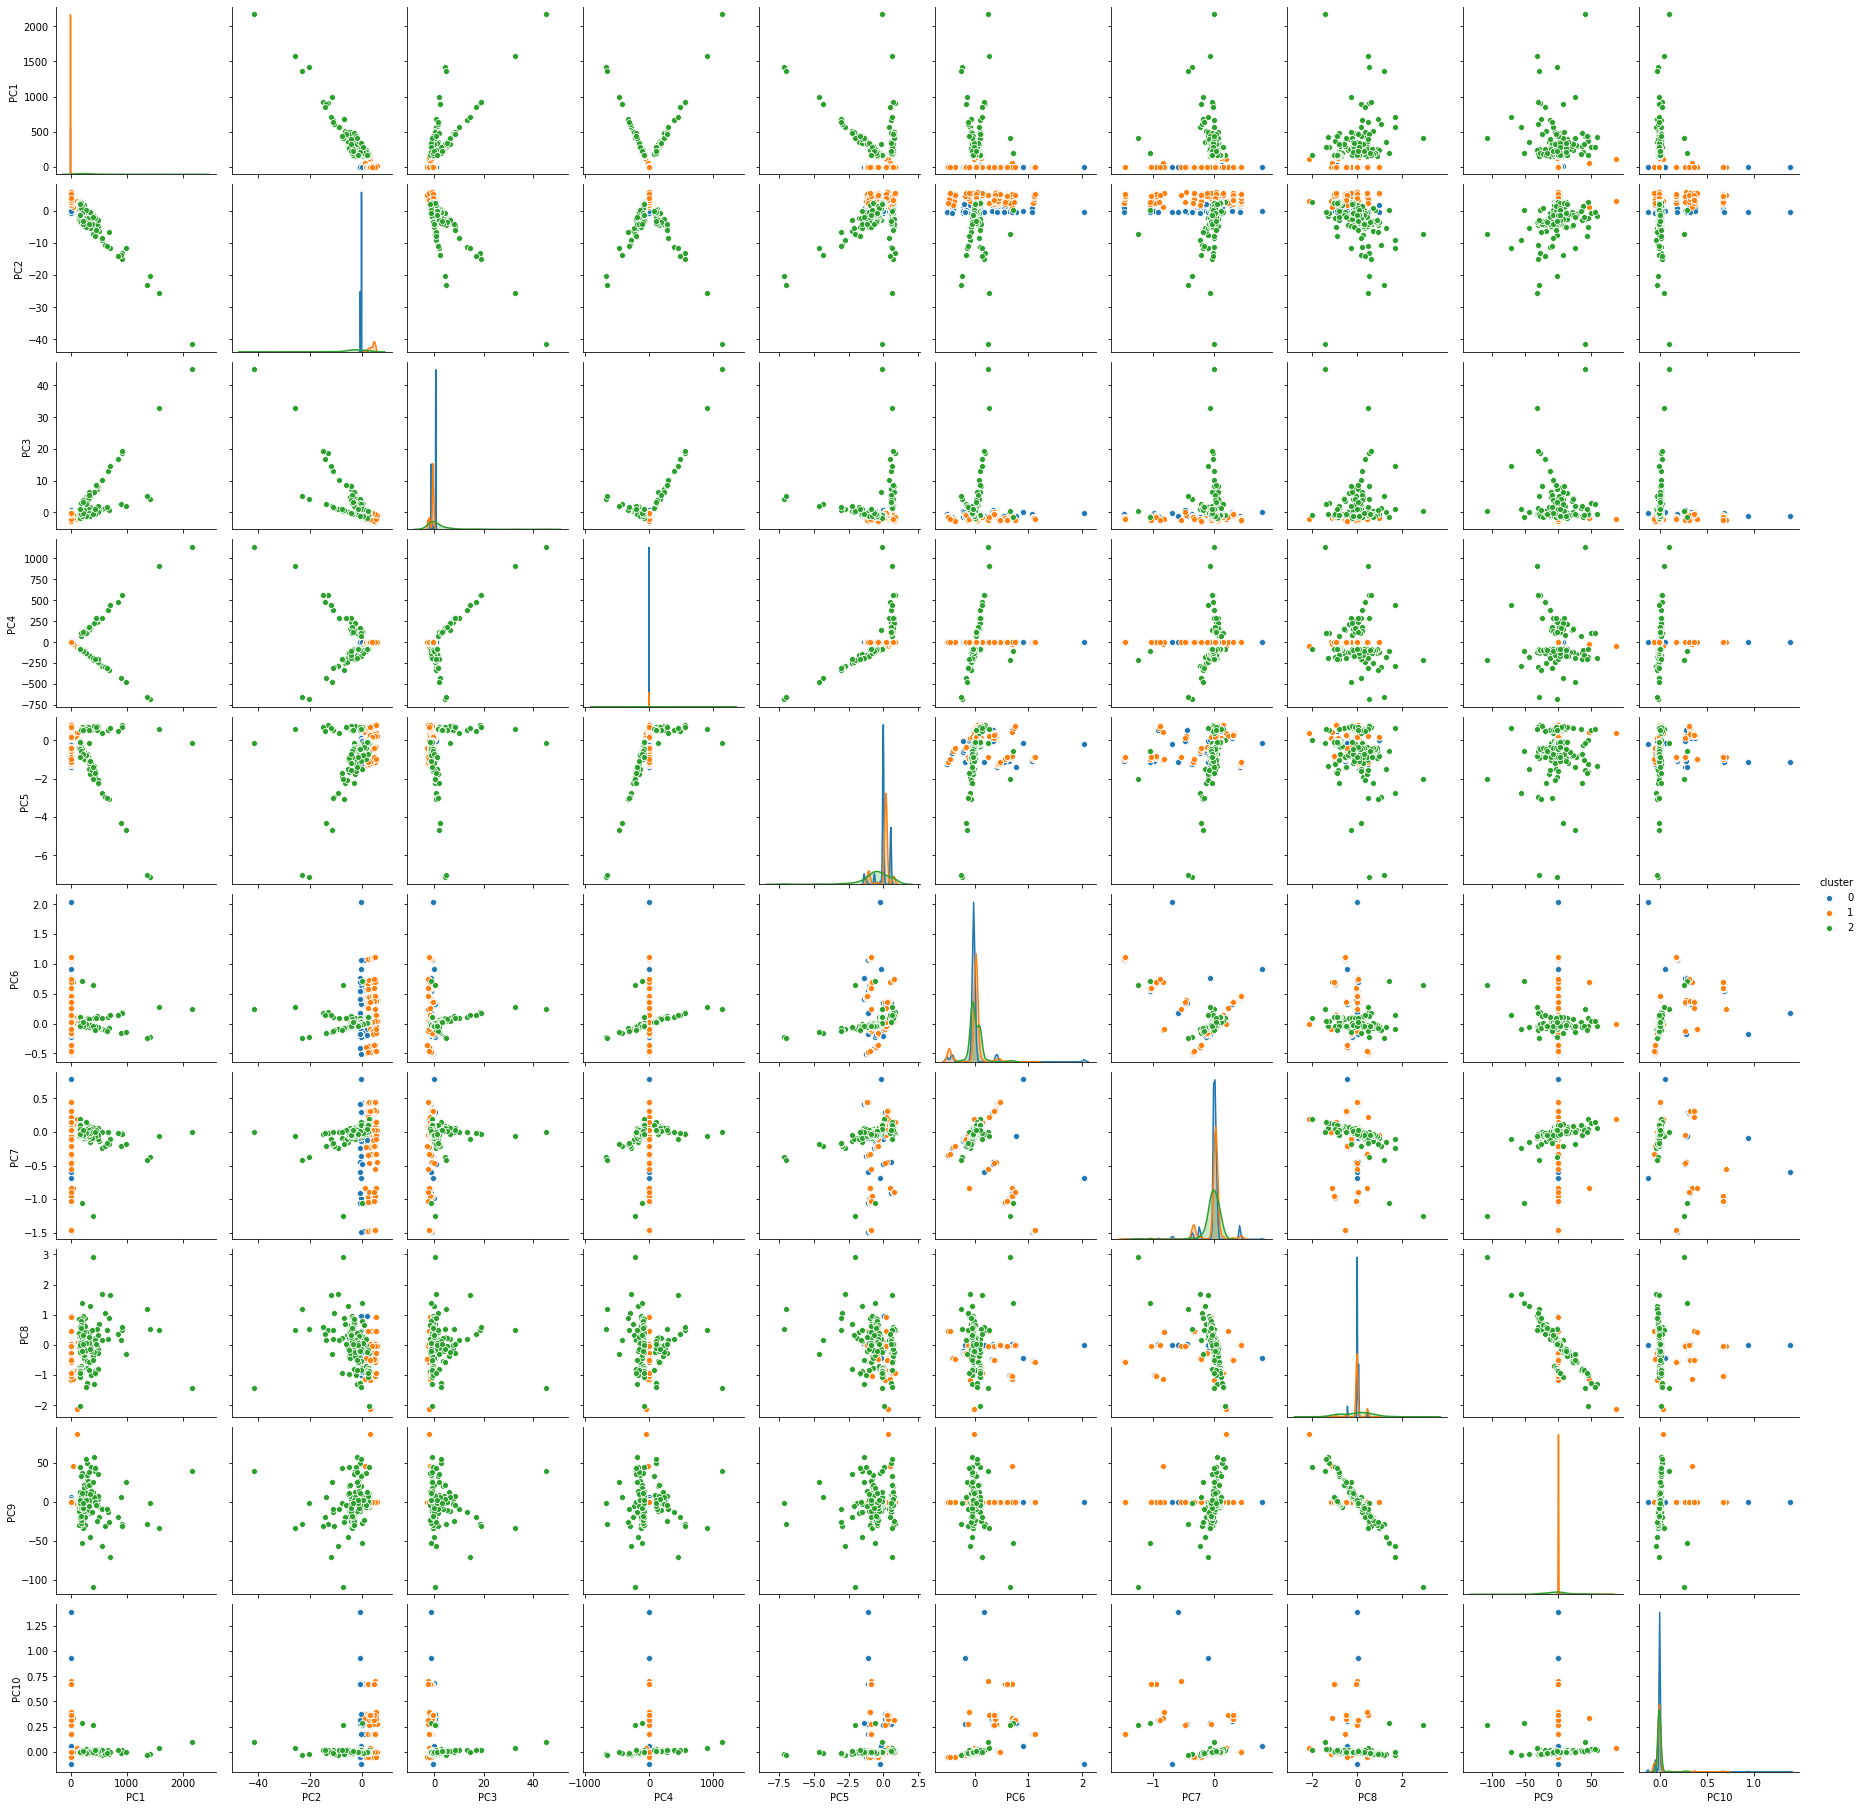

In [62]:
sns.pairplot(sample, hue = 'cluster')

In [69]:
d2.to_csv('/Applications/Splunk/etc/apps/Splunk_ML_Toolkit/lookups/A1_train_prediction.csv', sep=',')

In [71]:
df_train = pd.read_csv('../ml-data/cyberattack_detection/A2_1/training_data', sep=','
                       ,names=['Timestamp','Duration','Protocol','SrcIPAddress','SrcPort','Direction',
                               'DestIPAddress','DestPort','State','SrcTypeService','DestTypeService',
                               'TotalPackets','TotalBytes','SourceBytes'])

In [70]:
df_train['Direction'].value_counts()

125.189.87.2      7435547
230.72.91.222      444783
227.86.92.93       343763
238.87.91.232      176569
234.223.87.6       134230
                   ...   
136.33.67.150           1
171.120.142.97          1
197.82.41.101           1
167.131.8.2             1
135.17.225.215          1
Name: Direction, Length: 589071, dtype: int64

In [72]:
df2 = df_train[df_train.index.isin(d2.index)]

In [75]:
df2.head(40)

,Timestamp,Duration,Protocol,SrcIPAddress,SrcPort,Direction,DestIPAddress,DestPort,State,SrcTypeService,DestTypeService,TotalPackets,TotalBytes,SourceBytes
42330,2012/12/01 13:19:23.079263,2913.796423,tcp,131.179.92.105,42508,->,234.223.87.6,80,FSPA_FSPA,0.0,0.0,957569,812709490,24672269
77793,2012/12/01 13:27:40.701357,3487.617736,udp,144.105.93.187,35155,<->,154.127.109.154,64131,CON,0.0,0.0,519406,463226951,11645336
348964,2012/12/01 14:05:52.634943,1934.330010,tcp,169.105.93.27,36891,->,204.40.157.103,25443,FSRPA_FSPA,0.0,0.0,1442700,1205710921,40246207
524311,2012/12/01 14:42:22.980022,2572.039060,tcp,175.158.88.184,1627,->,191.173.200.176,80,SRPA_FSPA,0.0,0.0,746503,795738712,11591580
614948,2012/12/01 15:03:57.667980,3493.885969,tcp,131.179.92.105,47454,->,234.223.87.6,80,FSPA_FSPA,0.0,0.0,955604,769291578,25232415
658039,2012/12/01 15:14:56.522101,61.326600,tcp,237.110.91.52,34839,->,152.137.195.108,80,FSPA_FSPA,0.0,0.0,497565,551685823,9701407
957394,2012/12/01 16:16:44.714045,3471.420416,tcp,175.158.88.184,2235,->,131.229.208.96,80,SPA_SPA,0.0,0.0,644854,673321692,10913886
995721,2012/12/01 16:25:39.479087,3471.609640,tcp,162.15.93.46,37912,->,166.99.134.213,52009,SPA_SA,0.0,0.0,1460990,1492889622,1538036927
1184849,2012/12/01 17:02:58.492663,210.584470,tcp,237.110.91.52,55136,->,202.45.156.183,443,FSPA_FSPA,0.0,0.0,1320016,1337435259,27805395
1204421,2012/12/01 17:07:17.426391,765.372062,tcp,237.110.91.52,2524,->,167.193.173.5,27030,FSPA_FSPA,0.0,0.0,950785,1198788444,11454589
